# **PROJECT TITLE:** Borrower Segmentation and Credit Risk Profiling Using Clustering Techniques

## PROJECT OVERVIEW

This project leverages unsupervised clustering methods to segment borrowers based on their loan repayment behavior and overall credit profile. By applying data wrangling, feature engineering, and K-Means clustering, the analysis uncovers inherent patterns in repayment performance and differentiates clients into distinct risk groups. Key objectives include:

- Client Segmentation: Grouping borrowers based on metrics such as payment consistency, delay frequency, and recovery trends to reveal varying levels of risk.
- Segment Characterization: Profiling each cluster to identify defining financial and behavioral attributes, such as outstanding balances, fee structures, and revenue generation.
- Feature Importance Analysis: Employing techniques like Random Forest and PCA to determine which variables—such as loan age, days interest calculated, and revenue per loan—are most influential in driving credit risk.

These insights support targeted risk management strategies, inform tailored lending approaches, and enhance overall credit portfolio decision-making.

## PROJECT OBJECTIVE

The primary objective of this clustering analysis is to segment borrowers based on their loan repayment behavior and overall credit profile. By grouping clients into distinct clusters, the analysis aims to uncover inherent patterns in repayment performance, identify key characteristics of each borrower class, and determine the most influential features driving creditworthiness. These insights will enable targeted risk management, inform tailored lending strategies, and enhance credit portfolio decision-making.

### **Key Analysis Areas**

**a) Client Segmentation by Repayment Behavior**
- **Objective:** To group clients into distinct segments based on historical repayment data and behavior patterns.
- **Description:** This analysis will employ clustering techniques to classify borrowers according to metrics such as payment consistency, delay frequency, and recovery trends. The resulting segments will reflect varying levels of risk and repayment discipline, providing a foundation for further analysis.

**b) Characterization of Borrower Segments**
- **Objective:** To identify and profile the key financial and behavioral characteristics within each borrower segment.
- **Description:** Post-clustering, each segment will be analyzed to determine its defining attributes—such as outstanding balances, interest rates, and revenue contributions. This profiling will help in understanding the risk profile and performance trends within and across clusters.

**c) Feature Importance Analysis for Credit Profiling**
- **Objective:** To determine which features most significantly influence the clustering outcome and, by extension, the creditworthiness of borrowers.
- **Description:** Using methods such as Random Forest and PCA, the model will rank feature importance, highlighting the critical variables (e.g., age, days of interest calculated, revenue per loan) that drive borrower segmentation. This will provide actionable insights into the primary factors that differentiate high-risk from low-risk clients.


### **Data Features**
-**loan_id:** Unique identifier for the loan.

-**agent_id:** Identifier for the agent handling the loan.

-**loan_amount:** The total amount of the loan.

-**loan_balance:** The remaining balance of the loan.

-**amount_paid:** The total amount paid back so far.

-**outstanding_principle:** The remaining principal amount that has not been paid.

-**outstanding_daily_interest:** The daily interest that has not been paid.

-**outstanding_setup_fees:** The setup fees that have not been paid.

-**outstanding_penalty_fees:** The penalty fees that have not been paid.

-**interest_earned:** The interest earned on the loan.

-**principle_repayment:** The total amount repaid toward the principal of the loan.

-**setup_fees_repayment:** The total amount repaid toward the setup fees.

-**daily_interest_repayment:** The daily interest that has been repaid.

-**penalty_fees_repayment:** The penalty fees that have been repaid.

-**status_id:** Status of the loan.

-**defaulted:** Indicates if the loan has defaulted.

-**eligible_amount:** The amount eligible for repayment.

-**created_at:** The date the loan was created.

-**due_date:** The due date for the loan repayment.

-**last_repayment_date:** The date of the last repayment.

-**days_interest_calculated:** The number of days interest has been calculated.

-**age:** The age of the loan in days.

-**is_npl:** Binary indicator designating whether a loan is classified as non-performing.

-**created_month:** Month and year extracted from the loan creation date to facilitate time series analysis.

-**due_month:** Month and year extracted from the loan due date to enable monthly trend analysis.

-**last_repayment_month:** Month and year extracted from the date of the last repayment for temporal repayment pattern analysis.

-**days_since_last_repayment:** The number of days elapsed since the most recent repayment, indicating recent borrower activity.

-**days_past_due:** The number of days a payment is overdue, computed as the difference between the current date and the due date (with negative values adjusted to zero).

-**aging_bucket:** Categorical grouping of loans based on days past due (e.g., '0-30', '31-60', '61-90', '>90') used for risk stratification.

-**collection_rate:** The percentage of the eligible amount that has been repaid, reflecting repayment efficiency.

-**revenue_earned:** Aggregate revenue derived from interest, penalty fees, and daily interest repayment.

-**outstanding_revenue:** Sum of the remaining principal, daily interest, setup fees, and penalty fees yet to be repaid.

-**revenue_per_loan:** Ratio of total revenue earned to the initial loan amount, representing the revenue yield per loan.

### **Methodology**

-**Data Wrangling and preparation:** Data will be loaded, cleaned and prepared for modeling ensuring accuracy and regularity across the whole data range.

-**Modeling (Clustering Analysis):** After standardization and appropriate scaling of the data, it will be subjected to K-means clustering algorithm.

-**Visualization and Interpration of Clusters:** Graphical representations will be created to visualize the clusters as well as key characteristics distinguishing varying clusters.


## DATA UNDERSTANDING

### Imports & Parsing

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings

# Ensures plots are generated within the notebook
%matplotlib inline


In [2]:
# NB: Filepath can be adjusted depending on current working environment
filepath = 'C:/Users/Hp/Documents/WORK/TURBO GROUP/model_data_1.xlsx'

# Read the file into the working environment
df = pd.read_excel(filepath, parse_dates=True, date_format='%d/%b/%Y')

### Data Wrangling

In [3]:
# Sample the dataframe for visual inspection
df.sample(n=10, random_state=42)

,loan_id,agent_id,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,...,created_month,due_month,last_repayment_month,days_since_last_repayment,days_past_due,aging_bucket,collection_rate,revenue_earned,outstanding_revenue,revenue_per_loan
23474,b3ce91fc402c12b906bb281c5c58507f,201000000000491296,6000,0.00,6030.00,0.0,0.00,0.00,0.00,30.00,...,2023-09,NaN,2023-09,426,NaN,>90,12.060000,30.00,0.00,0.005000
42631,ba984c7af699fa5cb8a99fa594831bf1,201000000000365504,21043,0.00,21148.22,0.0,0.00,0.00,0.00,105.22,...,2023-10,NaN,2023-10,396,NaN,>90,5.496556,105.22,0.00,0.005000
22663,006be45872682c50a031e78f228e5a10,201000000000359392,1350,0.00,1356.75,0.0,0.00,0.00,0.00,6.75,...,2023-09,NaN,2023-09,427,NaN,>90,0.365129,6.75,0.00,0.005000
166172,43fa8e2d74d942ec47a0e3a70cf39f82,201000000000567008,5000,0.00,5124.36,0.0,0.00,0.64,0.00,124.36,...,2024-04,2024-06,2024-08,114,175.0,>90,10.248720,124.36,0.64,0.024872
1499,867af5aa4a4ae7525afac07ffe445a0f,201000000000742688,8850,0.00,8947.72,0.0,0.00,0.00,0.00,97.72,...,2023-08,NaN,2023-08,460,NaN,>90,16.081886,151.19,0.00,0.017084
149455,99b4c6417c08b35759d8ebed19768a6c,201000000000493408,6223,0.24,6507.00,0.0,0.22,0.00,0.02,284.00,...,2024-03,2024-07,2024-10,54,146.0,>90,13.014000,412.00,0.24,0.066206
9245,40a4706d527493a69c9d1670e2167225,201000000000536384,16084,0.00,16164.42,0.0,0.00,0.00,0.00,80.42,...,2023-08,NaN,2023-08,476,NaN,>90,5.003163,80.42,0.00,0.005000
246914,e2c567b8eca6a2f9c3d71bb5e7ee7124,201000000000806208,9000,0.00,9989.00,0.0,0.00,0.00,0.00,989.00,...,2024-04,2024-11,2024-07,137,20.0,0-30,19.277413,1753.00,0.00,0.194778
91839,7108b379aaed0007f2b295c69b624376,201000000000592096,8500,0.00,9307.50,0.0,0.00,0.00,0.00,807.50,...,2024-02,2024-09,2024-09,87,87.0,61-90,18.615000,1402.50,0.00,0.165000
217049,0fc355d48a531ac28209bd77f6f2b6c6,201000000000742400,35000,38681.00,14035.00,20965.0,12370.00,875.00,4471.00,0.00,...,2024-10,2024-06,2024-07,119,163.0,>90,28.070000,0.00,38681.00,0.000000


In [4]:
# Visually inspect for columns with NaN values

# Separate rows with and without NaN values
rows_with_nan = df[df.isna().any(axis=1)]
rows_without_nan = df[~df.isna().any(axis=1)]

# Sample from each subset
sample_with_nan = rows_with_nan.sample(n=5, random_state=42)  # Ensure reproducibility
sample_without_nan = rows_without_nan.sample(n=5, random_state=42)

# Combine the samples
sampled_df = pd.concat([sample_with_nan, sample_without_nan])

#print(sampled_df)
sampled_df

,loan_id,agent_id,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,...,created_month,due_month,last_repayment_month,days_since_last_repayment,days_past_due,aging_bucket,collection_rate,revenue_earned,outstanding_revenue,revenue_per_loan
14050,5481ec85e1604bf617653bbe36931b85,201000000000496096,1000,0.0,1005.00,0.0,0.0,0.0,0.0,5.00,...,2023-09,NaN,2023-09,438,NaN,>90,0.319396,5.00,0.0,0.005000
57481,df8273c5a9f4464c85492fc8bb99f6fb,201000000000360608,36380,0.0,36561.90,0.0,0.0,0.0,0.0,181.90,...,2023-11,NaN,2023-11,375,NaN,>90,16.848393,181.90,0.0,0.005000
43337,ca7e5d99020254c98855412ff9f74ede,201000000000483008,1319,0.0,1325.59,0.0,0.0,0.0,0.0,6.59,...,2023-10,NaN,2023-10,396,NaN,>90,0.180239,6.59,0.0,0.004996
185689,47eb727a1a347d84e5bb8977f9c0fec6,201000000000336512,49812,75701.0,0.00,49812.0,17762.0,1245.0,6882.0,0.00,...,2024-05,2024-05,2024-05,193,186.0,>90,0.000000,NaN,75701.0,NaN
82526,7c8a5c24748561e4a2b776d4dc356ede,201000000000524096,18500,0.0,18592.50,0.0,0.0,0.0,0.0,92.50,...,2023-12,NaN,2023-12,343,NaN,>90,7.497051,92.50,0.0,0.005000
215931,88fd2cb588eae0f73081c6646c6150cb,201000000000525600,8500,0.0,9624.00,0.0,0.0,0.0,0.0,1124.00,...,2024-08,2024-06,2024-06,161,165.0,>90,19.248000,2035.00,0.0,0.239412
272765,f8a67717278d4f08d4319c7527308a85,201000000000787104,78547,0.0,87612.00,0.0,0.0,0.0,0.0,9065.00,...,2024-07,2024-07,2024-03,264,119.0,>90,98.402857,16166.00,0.0,0.205813
199227,e9e40c4c69bfbb311e16819c0fc45d00,201000000000727616,30500,0.0,33519.00,0.0,0.0,0.0,0.0,3019.00,...,2024-05,2024-03,2024-04,235,266.0,>90,7.516351,5275.00,0.0,0.172951
263782,2fdcc57e6385a0c7c27f5b32f01e3774,201000000000484800,18981,0.0,20859.00,0.0,0.0,0.0,0.0,1878.00,...,2024-07,2024-07,2024-07,126,126.0,>90,41.718000,3281.00,0.0,0.172857
84274,8d717ad7772133de7317f42d876849c1,201000000000697312,127000,0.0,130200.46,0.0,0.0,0.0,0.0,3200.46,...,2023-12,2023-12,2023-12,339,340.0,>90,111.915446,5765.92,0.0,0.045401


In [5]:
# Statistical summary of the numerical columns in the dataframe
df.describe()

,agent_id,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,principle_repayment,...,last_repayment_date,days_interest_calculated,age,is_npl,days_since_last_repayment,days_past_due,collection_rate,revenue_earned,outstanding_revenue,revenue_per_loan
count,2.884460e+05,2.884460e+05,2.884460e+05,2.884460e+05,2.884460e+05,288446.000000,288446.000000,288446.000000,288446.000000,2.697850e+05,...,288446,288446.000000,288446.000000,288446.000000,288446.000000,203590.000000,288446.000000,2.697850e+05,2.884460e+05,269785.000000
mean,2.010000e+17,2.394264e+04,2.408474e+03,2.338799e+04,1.820662e+03,415.676313,47.308286,123.252379,1266.009303,2.365215e+04,...,2024-03-08 20:17:56.333178368,6.801814,9.795598,0.052426,263.305558,185.172626,18.466052,2.335622e+03,2.406899e+03,0.124602
min,2.010000e+17,1.000000e+00,0.000000e+00,0.000000e+00,-1.030000e+05,-2334.000000,-925.000000,0.000000,0.000000,2.000000e-02,...,2023-01-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.035150e+05,0.000000
25%,2.010000e+17,3.500000e+03,0.000000e+00,2.768000e+03,0.000000e+00,0.000000,0.000000,0.000000,52.500000,3.469000e+03,...,2023-11-29 00:00:00,0.000000,1.000000,0.000000,157.000000,131.000000,2.481383,9.700000e+01,0.000000e+00,0.005000
50%,2.010000e+17,9.946000e+03,0.000000e+00,8.839470e+03,0.000000e+00,0.000000,0.000000,0.000000,288.000000,9.649000e+03,...,2024-04-03 00:00:00,7.000000,7.000000,0.000000,238.000000,184.000000,8.489266,5.000000e+02,0.000000e+00,0.129250
75%,2.010000e+17,2.250000e+04,0.000000e+00,2.211000e+04,0.000000e+00,0.000000,0.000000,0.000000,1079.000000,2.200000e+04,...,2024-06-23 00:00:00,7.000000,8.000000,0.000000,364.000000,253.000000,22.550000,1.952000e+03,0.000000e+00,0.172874
max,2.010000e+17,2.065000e+06,2.646558e+06,2.567576e+06,1.741500e+06,620924.000000,43538.000000,240596.000000,865866.000000,2.065000e+06,...,2024-12-07 00:00:00,171.000000,356.000000,1.000000,688.000000,688.000000,2140.659418,1.689189e+06,2.646558e+06,1.540000
std,1.413122e+05,5.840495e+04,2.442308e+04,5.850679e+04,1.751825e+04,5349.097861,436.738347,1972.549331,4490.971691,5.778920e+04,...,NaN,7.589373,22.309433,0.222884,143.683535,84.259027,27.992265,8.626842e+03,2.442476e+04,0.161615


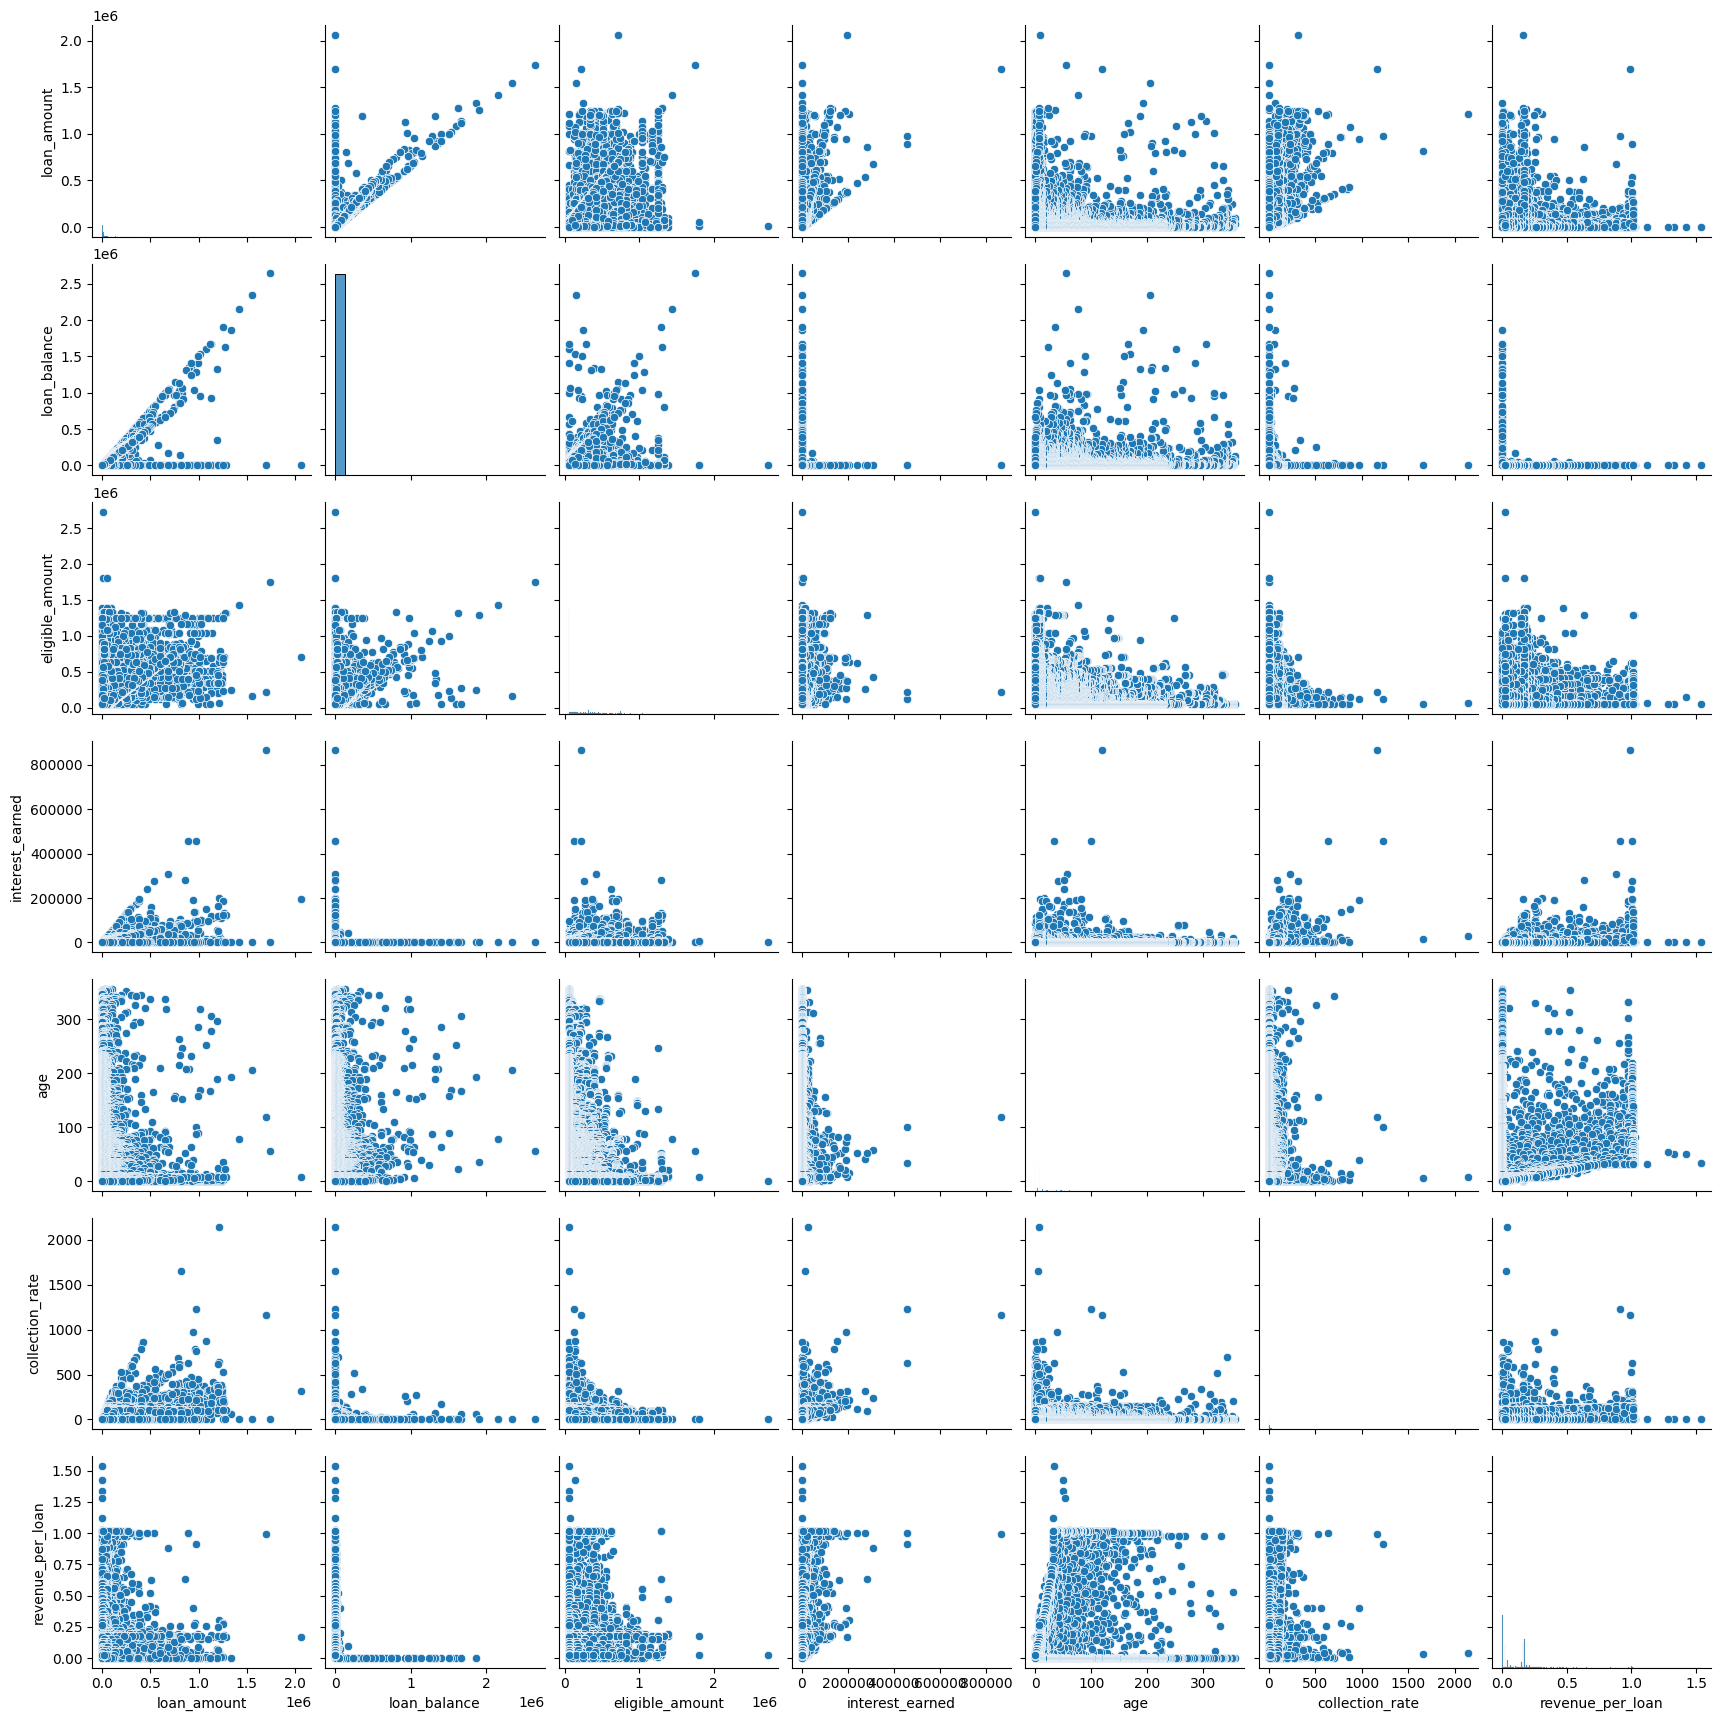

In [6]:
# Generate a list of features to visualize using the pairplot
pair_features = ['loan_amount', 'loan_balance', 'eligible_amount', 'interest_earned', 'age', 'collection_rate', 'revenue_per_loan']
# Generate the pairplot
sns.pairplot(df[pair_features], diag_kind='auto')
plt.show();

In [7]:
# Obtain metadata of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_id                     288446 non-null  object        
 1   agent_id                    288446 non-null  int64         
 2   loan_amount                 288446 non-null  int64         
 3   loan_balance                288446 non-null  float64       
 4   amount_paid                 288446 non-null  float64       
 5   outstanding_principle       288446 non-null  float64       
 6   outstanding_daily_interest  288446 non-null  float64       
 7   outstanding_setup_fees      288446 non-null  float64       
 8   outstanding_penalty_fees    288446 non-null  float64       
 9   interest_earned             288446 non-null  float64       
 10  principle_repayment         269785 non-null  float64       
 11  setup_fees_repayment        269785 non-

In [8]:
# List out and enumerate the columns present in the dataframe
print (df.columns,sep='\n')

print(f'The DataFrame has a total of {len(df.columns)} columns.')

Index(['loan_id', 'agent_id', 'loan_amount', 'loan_balance', 'amount_paid',
       'outstanding_principle', 'outstanding_daily_interest',
       'outstanding_setup_fees', 'outstanding_penalty_fees', 'interest_earned',
       'principle_repayment', 'setup_fees_repayment',
       'daily_interest_repayment', 'penalty_fees_repayment', 'status_id',
       'defaulted', 'eligible_amount', 'created_at', 'due_date',
       'last_repayment_date', 'days_interest_calculated', 'age', 'is_npl',
       'created_month', 'due_month', 'last_repayment_month',
       'days_since_last_repayment', 'days_past_due', 'aging_bucket',
       'collection_rate', 'revenue_earned', 'outstanding_revenue',
       'revenue_per_loan'],
      dtype='object')
The DataFrame has a total of 33 columns.


In [9]:
# Calculate the count of NaN values per column as a ratio of the overall 
nan_counts = df.isna().sum() / len(df)

# Filter to include only columns with NaN values
nan_columns_df = nan_counts[nan_counts > 0].reset_index()
nan_columns_df.columns = ['Column', 'NaN_Count_Ratio']

# Print out the results
print(nan_columns_df)

                     Column  NaN_Count_Ratio
0       principle_repayment         0.064695
1      setup_fees_repayment         0.064695
2  daily_interest_repayment         0.064695
3    penalty_fees_repayment         0.064695
4                  due_date         0.294183
5                 due_month         0.294183
6             days_past_due         0.294183
7            revenue_earned         0.064695
8          revenue_per_loan         0.064695



- Since deleting null values would result in a data loss of 6% at best and 30% at worst, it is imperative that alternative cleaning methods are applied to minimize data loss. The first strategy is to fill in all null values within monetary columns with zeros as it can be assumed that no revenue/fees were collected in these cases. 

- Lastly, the 'age' column can be used to make inferences regarding the columns with missing date values.


In [10]:
# Fill all monetary related columns with 0. 
# NB: The assumption made is that no revenue/repayments were collected in these cases
money_columns = ['principle_repayment', 'setup_fees_repayment', 
                 'daily_interest_repayment', 'penalty_fees_repayment', 
                 'revenue_earned','revenue_per_loan']
# Fill NaN values with 0 for the specified columns
df[money_columns] = df[money_columns].fillna(0)

In [11]:
# Even though the 'due_date' column has null values but the 'age column doesnt; 
# hence, we can use the age of the loan in days to find the missing values in the 'due_date' column
df['calculated_due_date'] = df['created_at'] + pd.to_timedelta(df['age'], unit='d')

In [12]:
# Combine pre-existing due dates with calculated due dates
df['due_date'] = pd.to_datetime(df['due_date'])  # Ensure existing dates are in datetime format
df['due_date'] = df['due_date'].fillna(df['calculated_due_date'])

In [13]:
similar_count = (df['due_date'] == df['calculated_due_date']).sum()
print(f"Number of similar values: {similar_count}")

Number of similar values: 119571


In [14]:
# Add a column to indicate if the values are similar
df['is_similar'] = df['due_date'] == df['calculated_due_date']

print(df['is_similar'].value_counts())

is_similar
False    168875
True     119571
Name: count, dtype: int64


In [15]:
# Calculate 'due_month' using new 'calculated_due_month' column
df['due_month'] = df['calculated_due_date'].dt.to_period('M')

In [16]:
df.isna().sum()

loan_id                           0
agent_id                          0
loan_amount                       0
loan_balance                      0
amount_paid                       0
outstanding_principle             0
outstanding_daily_interest        0
outstanding_setup_fees            0
outstanding_penalty_fees          0
interest_earned                   0
principle_repayment               0
setup_fees_repayment              0
daily_interest_repayment          0
penalty_fees_repayment            0
status_id                         0
defaulted                         0
eligible_amount                   0
created_at                        0
due_date                          0
last_repayment_date               0
days_interest_calculated          0
age                               0
is_npl                            0
created_month                     0
due_month                         0
last_repayment_month              0
days_since_last_repayment         0
days_past_due               

In [17]:
# The timestamp (6/8/2024  12:00:00 AM) is fixed as that is the period of analysis required for the project,
# consequently, we calculate 'days_past_due' using this value

# Define the fixed timestamp for calculation
fixed_timestamp = pd.Timestamp('2024-06-08 00:00:00')

# Compute the number of days past the due date if the loan is overdue
df['days_past_due'] = (fixed_timestamp - df['due_date']).dt.days

# Apply a lambda function to ensure no negative values
df['days_past_due'] = df['days_past_due'].apply(lambda x: max(x, 0))


In [18]:
# Ensure the column no longer has null values
df['days_past_due'].isna().sum()

np.int64(0)

In [19]:
# Confirm that the dataset has no ore null values
df.isna().sum()

loan_id                       0
agent_id                      0
loan_amount                   0
loan_balance                  0
amount_paid                   0
outstanding_principle         0
outstanding_daily_interest    0
outstanding_setup_fees        0
outstanding_penalty_fees      0
interest_earned               0
principle_repayment           0
setup_fees_repayment          0
daily_interest_repayment      0
penalty_fees_repayment        0
status_id                     0
defaulted                     0
eligible_amount               0
created_at                    0
due_date                      0
last_repayment_date           0
days_interest_calculated      0
age                           0
is_npl                        0
created_month                 0
due_month                     0
last_repayment_month          0
days_since_last_repayment     0
days_past_due                 0
aging_bucket                  0
collection_rate               0
revenue_earned                0
outstand


- Now that all null values have been eliminated from the data, we are now ready to do some modeling.



**NB:** 'defaulted', 'status_id', and 'is_npl' columns have similar outputs hence can be used interchangably

In [20]:
df.columns

Index(['loan_id', 'agent_id', 'loan_amount', 'loan_balance', 'amount_paid',
       'outstanding_principle', 'outstanding_daily_interest',
       'outstanding_setup_fees', 'outstanding_penalty_fees', 'interest_earned',
       'principle_repayment', 'setup_fees_repayment',
       'daily_interest_repayment', 'penalty_fees_repayment', 'status_id',
       'defaulted', 'eligible_amount', 'created_at', 'due_date',
       'last_repayment_date', 'days_interest_calculated', 'age', 'is_npl',
       'created_month', 'due_month', 'last_repayment_month',
       'days_since_last_repayment', 'days_past_due', 'aging_bucket',
       'collection_rate', 'revenue_earned', 'outstanding_revenue',
       'revenue_per_loan', 'calculated_due_date', 'is_similar'],
      dtype='object')

## DATA MODELING

### Feature Engineering

#### **Case 1:** Determining Feature importance using Random Forest 

- At this juncture we begin selecting features that will be most relevant to the modeling that is to be performed. We drop all date and categorical columns from the dataset and focus on numerical columns mainly. 

In [21]:
# Select only the numeric features that could be relevant to correlation
numerical_features = [
    'loan_amount', 'loan_balance', 'amount_paid', 'outstanding_principle', 
    'outstanding_daily_interest', 'outstanding_setup_fees', 'outstanding_penalty_fees', 
    'interest_earned', 'principle_repayment', 'setup_fees_repayment', 
    'daily_interest_repayment', 'penalty_fees_repayment', 'eligible_amount', 
    'days_interest_calculated', 'age', 'days_since_last_repayment', 'days_past_due', 
    'collection_rate', 'revenue_earned', 'outstanding_revenue', 'revenue_per_loan'
]

# Add the 'defaulted' column (or 'is_npl' depending on which you use) to the features to calculate correlation
features = numerical_features + ['is_npl']

# Select only the relevant columns from the dataframe
df_selected = df[features].copy()

In [22]:
#Obtain metadata of the selected dataframe
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amount                 288446 non-null  int64  
 1   loan_balance                288446 non-null  float64
 2   amount_paid                 288446 non-null  float64
 3   outstanding_principle       288446 non-null  float64
 4   outstanding_daily_interest  288446 non-null  float64
 5   outstanding_setup_fees      288446 non-null  float64
 6   outstanding_penalty_fees    288446 non-null  float64
 7   interest_earned             288446 non-null  float64
 8   principle_repayment         288446 non-null  float64
 9   setup_fees_repayment        288446 non-null  float64
 10  daily_interest_repayment    288446 non-null  float64
 11  penalty_fees_repayment      288446 non-null  float64
 12  eligible_amount             288446 non-null  float64
 13  days_interest_

In [23]:
# Statistical summary of the selected dataframe
df_selected.describe()

,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,principle_repayment,setup_fees_repayment,...,eligible_amount,days_interest_calculated,age,days_since_last_repayment,days_past_due,collection_rate,revenue_earned,outstanding_revenue,revenue_per_loan,is_npl
count,2.884460e+05,2.884460e+05,2.884460e+05,2.884460e+05,288446.000000,288446.000000,288446.000000,288446.000000,2.884460e+05,288446.000000,...,2.884460e+05,288446.000000,288446.000000,288446.000000,288446.000000,288446.000000,2.884460e+05,2.884460e+05,288446.000000,288446.000000
mean,2.394264e+04,2.408474e+03,2.338799e+04,1.820662e+03,415.676313,47.308286,123.252379,1266.009303,2.212198e+04,347.499927,...,1.718977e+05,6.801814,9.795598,263.305558,108.795657,18.466052,2.184519e+03,2.406899e+03,0.116541,0.052426
std,5.840495e+04,2.442308e+04,5.850679e+04,1.751825e+04,5349.097861,436.738347,1972.549331,4490.971691,5.619063e+04,879.681848,...,1.981511e+05,7.589373,22.309433,143.683535,124.306566,27.992265,8.362877e+03,2.442476e+04,0.159276,0.222884
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.030000e+05,-2334.000000,-925.000000,0.000000,0.000000,0.000000e+00,0.000000,...,5.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.035150e+05,0.000000,0.000000
25%,3.500000e+03,0.000000e+00,2.768000e+03,0.000000e+00,0.000000,0.000000,0.000000,52.500000,2.510000e+03,31.130000,...,5.000000e+04,0.000000,1.000000,157.000000,0.000000,2.481383,6.000000e+01,0.000000e+00,0.005000,0.000000
50%,9.946000e+03,0.000000e+00,8.839470e+03,0.000000e+00,0.000000,0.000000,0.000000,288.000000,8.169000e+03,125.000000,...,5.000000e+04,7.000000,7.000000,238.000000,66.000000,8.489266,4.110000e+02,0.000000e+00,0.065596,0.000000
75%,2.250000e+04,0.000000e+00,2.211000e+04,0.000000e+00,0.000000,0.000000,0.000000,1079.000000,2.050000e+04,358.000000,...,2.390975e+05,7.000000,8.000000,364.000000,192.000000,22.550000,1.750000e+03,0.000000e+00,0.172846,0.000000
max,2.065000e+06,2.646558e+06,2.567576e+06,1.741500e+06,620924.000000,43538.000000,240596.000000,865866.000000,2.065000e+06,51625.000000,...,2.726780e+06,171.000000,356.000000,688.000000,516.000000,2140.659418,1.689189e+06,2.646558e+06,1.540000,1.000000


In [24]:
# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Filter the correlation matrix to only show correlations with the 'defaulted' column (or 'is_npl')
correlation_with_defaulted = correlation_matrix[['is_npl']].sort_values(by='is_npl', ascending=False)

# Print the correlation of all features with 'defaulted'
print(correlation_with_defaulted)


                              is_npl
is_npl                      1.000000
age                         0.765282
days_interest_calculated    0.752808
revenue_per_loan            0.391772
outstanding_penalty_fees    0.265645
outstanding_daily_interest  0.251620
penalty_fees_repayment      0.229860
outstanding_revenue         0.217277
loan_balance                0.217276
outstanding_setup_fees      0.198514
outstanding_principle       0.191247
revenue_earned              0.124582
interest_earned             0.111966
daily_interest_repayment    0.106349
loan_amount                 0.010341
collection_rate             0.007988
amount_paid                -0.038347
setup_fees_repayment       -0.041138
principle_repayment        -0.048876
eligible_amount            -0.085644
days_past_due              -0.102401
days_since_last_repayment  -0.119254


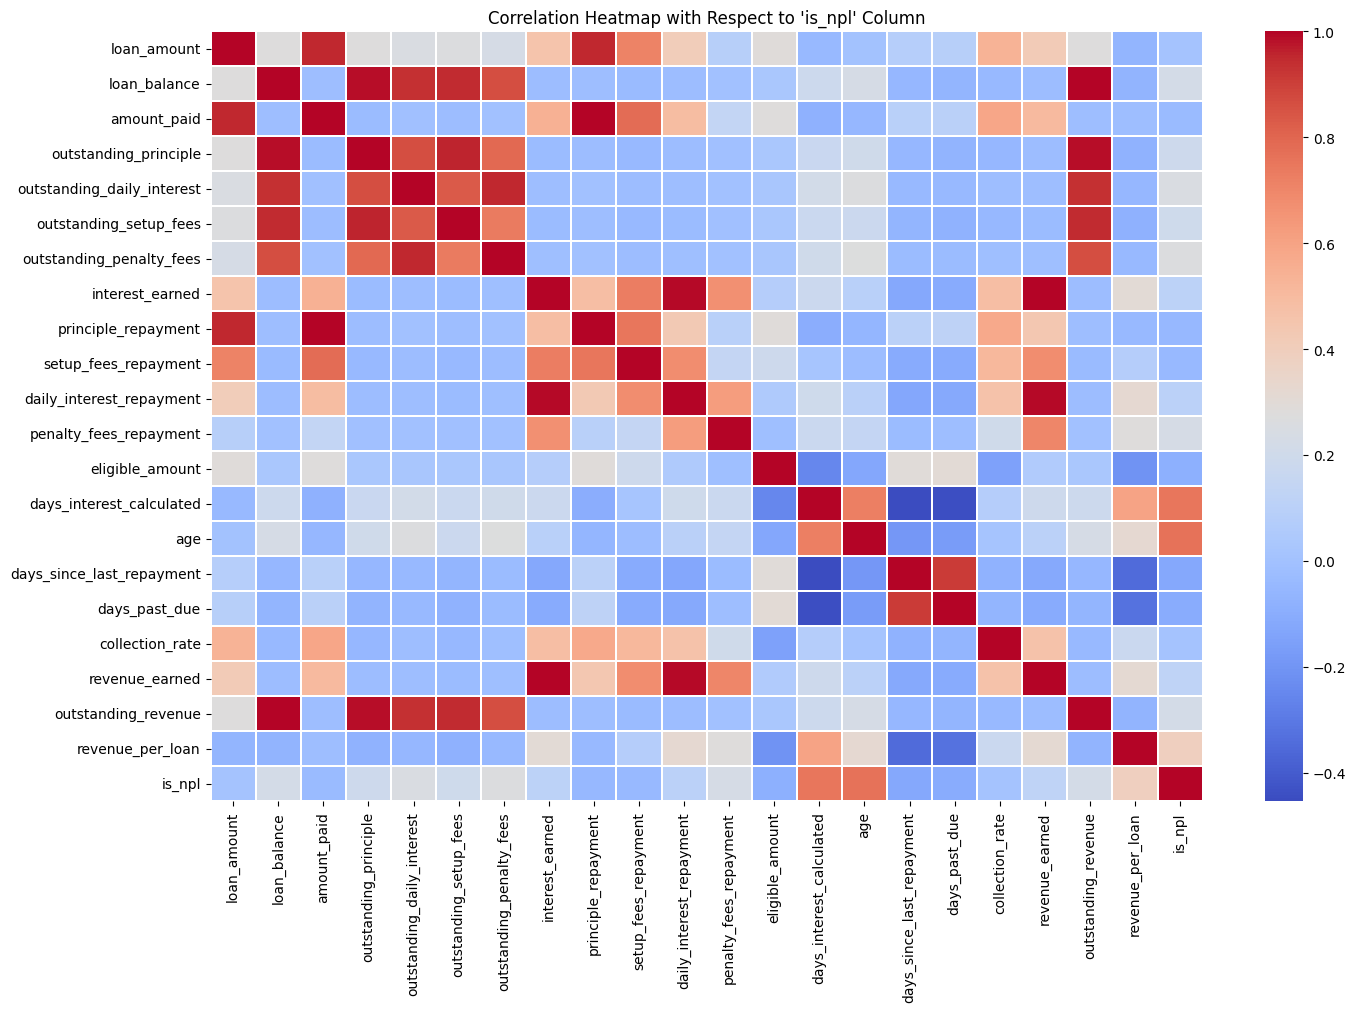

In [25]:
# Generate the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.1)
# Title and labels
plt.title("Correlation Heatmap with Respect to 'is_npl' Column")
# Save the heatmap as an image
plt.savefig('correlation_heatmap.png')
plt.show()


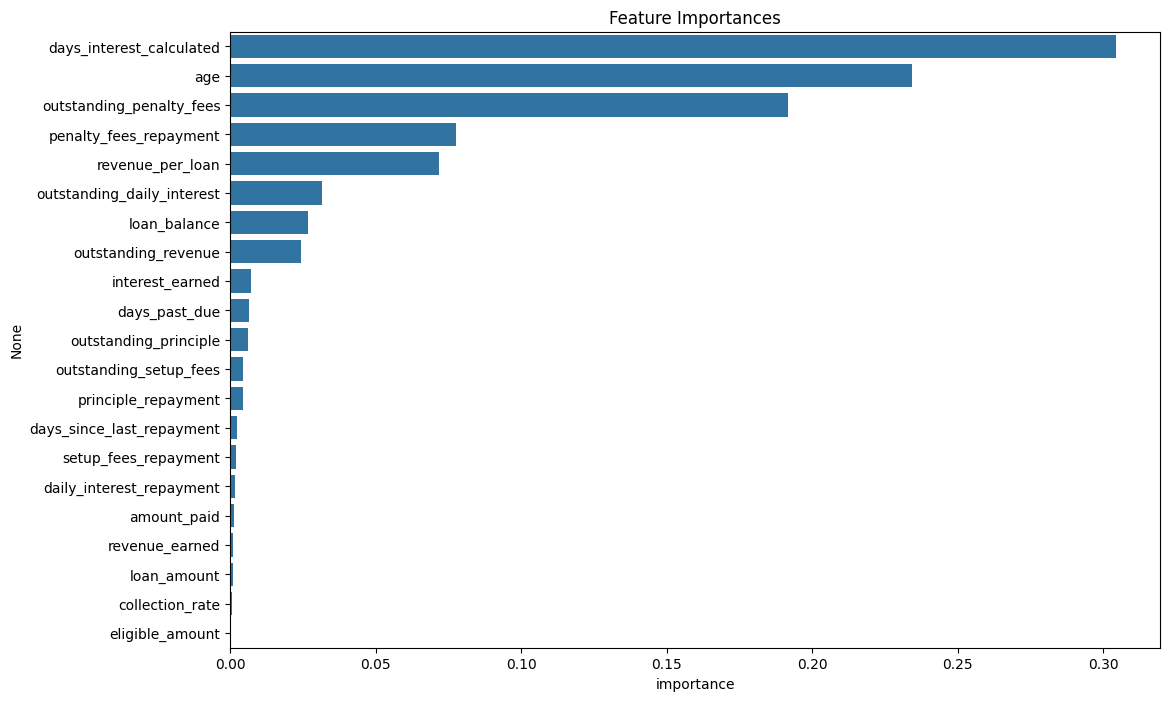

In [26]:
# Define X & y for the Random Forest Classifier
X = df[numerical_features]
y = df['is_npl']
# Create and fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
# Obtain feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
# Save plot as image
plt.savefig('RF_feature_importance.png')
plt.show()

#### **Case 2:** Determining Feature Importance using PCA

In [27]:
# Create and fit a PCA object
pca = PCA(n_components=len(df_selected.columns))
pca.fit(df_selected)

# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

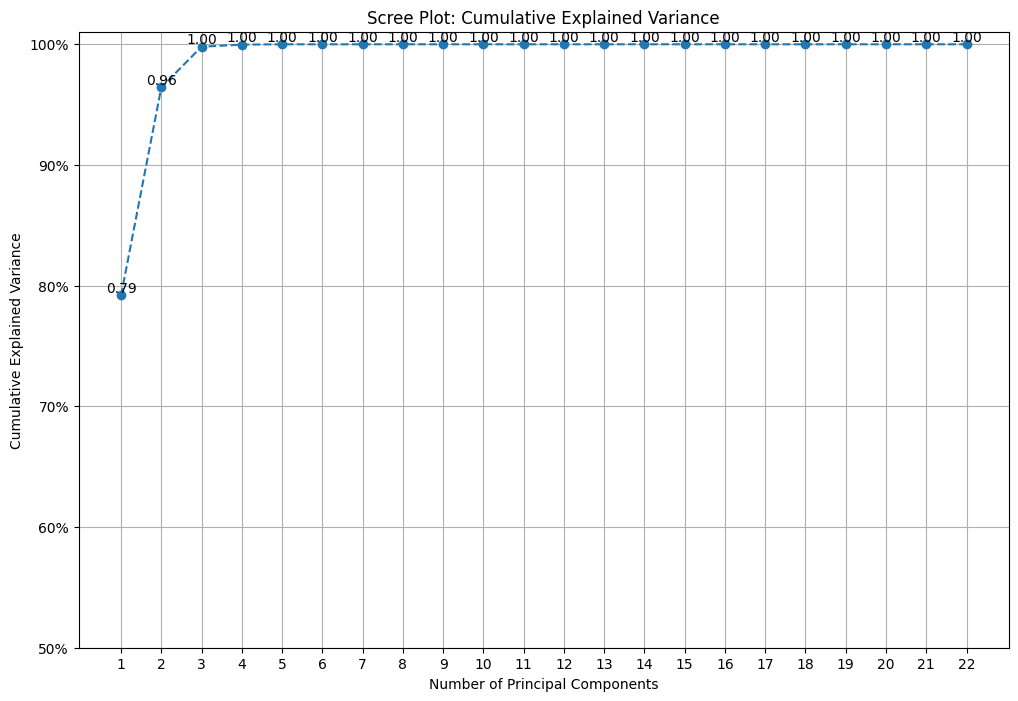

In [28]:

# Create the scree plot
plt.figure(figsize=(12, 8))
plt.plot(
    range(1, len(df_selected.columns) + 1),
    cumulative_explained_variance,
    marker='o', 
    linestyle='--'
)

# Add labels and annotations
plt.xticks(range(1, len(df_selected.columns) + 1))
plt.yticks([i / 100 for i in range(50, 101, 10)], labels=[f"{i}%" for i in range(50, 101, 10)])
for i, ev in enumerate(cumulative_explained_variance):
    if ev >= 0.5:  # Only label points in range
        plt.text(i + 1, ev, f"{ev:.2f}", ha='center', va='bottom')
# Add title and labels
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
# Save the scree plot as an image
plt.savefig('scree_plot.png')
plt.show();


In [29]:
print(pca.explained_variance_ratio_)

[7.91886401e-01 1.72395533e-01 3.36991049e-02 1.72512557e-03
 2.71065770e-04 1.01164193e-05 6.40286809e-06 4.38873223e-06
 8.84627404e-07 5.52366002e-07 3.77159257e-07 2.96114250e-08
 8.86647761e-09 7.82843252e-09 3.64152165e-10 2.65604644e-13
 2.56739972e-13 6.40477948e-17 1.83883118e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [30]:
print(type(pca.explained_variance_ratio_))

<class 'numpy.ndarray'>


In [31]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.99) + 1  # +1 to convert index to count

print(f"The principal components required to explain 99% of the variance in this dataset are {num_components}.")

The principal components required to explain 99% of the variance in this dataset are 3.



- With further refinement through PCA we identify that a minimum of 3 principal components are required to describe upto 99.% of the variance in the data . Furthermore , by use of RandomForest we are able to obtain a sorted list of the most important features.


### **Cluster Assignment**

 The following features were found to have the greatest impact on loan performance according to Random Forest feature importance as well as PCA analyses. The features chosen for clustering i.e cluster_features are chosen as a result of their higher relative correlation with respect to the 'is_npl' column with a threshold of approximately ± 0.2.
 The features chosen are as follows;
 
 - 'age'
 - 'days_interest_calculated'
 - 'revenue_per_loan'
 - 'outstanding_penalty_fees'
 - 'outstanding_daily_interest'
 - 'penalty_fees_repayment'
 - 'outstanding_revenue'
 - 'loan_balance'
 - 'outstanding_setup_fees'
 - 'outstanding_principle'
 - 'is_npl'


From the above information, the following can be deduced;

 - 'age', 'days_interest_calculated' have the highest influence on default rate('is_npl) with correlations exceeding +0.75
 - 'revenue_per-loan', 'outstanding_penalty_fees', 'outstanding_daily_interest' have moderate influence on default rate with corrlations between +0.25 but less than +0.75.
 - 'penalty_fees_repayment', 'outstanding_revenue', 'loan_balance' have weak influence on the taget variable with correlations between +0.2 and +0.25
 - 'Despite 'outstanding_setup_fees', 'outstanding_principle' having the least influence on the default rate with correlations slightly less than +0.2, they were included in the model for robustness.
 

In [32]:
# Select the most relevant features based on feature importance analysis
cluster_features = ['age', 'days_interest_calculated', 'revenue_per_loan',
       'outstanding_penalty_fees', 'outstanding_daily_interest', 
       'penalty_fees_repayment', 'outstanding_revenue', 
       'loan_balance', 'outstanding_setup_fees', 'outstanding_principle',
       'is_npl']

# Select these features from the dataset
df_cluster = df[cluster_features].copy()

# Check for missing values (you already handled null values earlier)
print(df_cluster.isnull().sum())


age                           0
days_interest_calculated      0
revenue_per_loan              0
outstanding_penalty_fees      0
outstanding_daily_interest    0
penalty_fees_repayment        0
outstanding_revenue           0
loan_balance                  0
outstanding_setup_fees        0
outstanding_principle         0
is_npl                        0
dtype: int64


In [33]:
# Define the preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizes the features
])

# Apply preprocessing to the selected features
df_scaled = preprocessor.fit_transform(df[cluster_features])  # Note: df_scaled is now ready for clustering


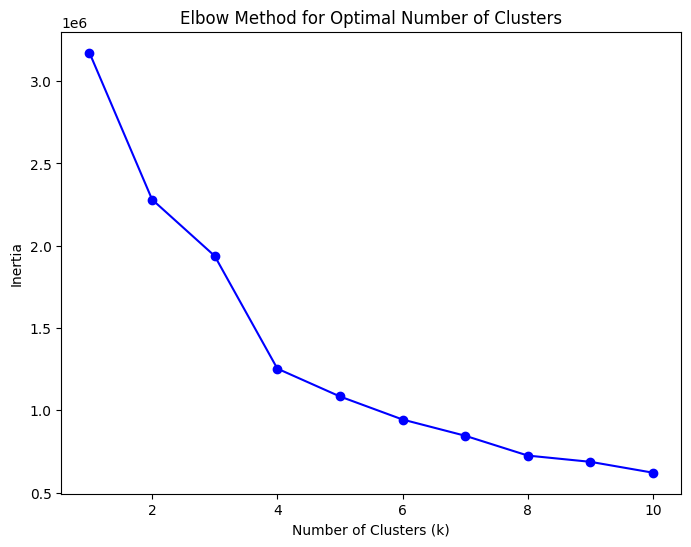

In [34]:
# Create a pipeline with preprocessing and KMeans
inertia = []
K_range = range(1, 11)  # Test for 1 to 10 clusters

for k in K_range:
    clustering_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing step
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    clustering_pipeline.fit(df[cluster_features])
    inertia.append(clustering_pipeline['kmeans'].inertia_)  # Store inertia

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
# Save the Elbow curve as an image
plt.savefig('clusters_elbow_curve.png')

plt.show();


In [35]:
# Define the pipeline with the chosen number of clusters (i.e., k=4)

optimal_clusters = 4    #As observed in the above visualization (at the point of greatest change in inertia in the curve)

clustering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_clusters, random_state=42))
])

# Fit the pipeline and predict cluster labels
df['Cluster'] = clustering_pipeline.fit_predict(df[cluster_features])

# Display the first few rows of the dataset with cluster labels
print(df[['loan_id', 'Cluster']].head())

                            loan_id  Cluster
0  37c8a45dbbcf8e09189064ea4457adb0        0
1  975d6d720f528cf94f523d6ba1d5c111        0
2  6cb7205ddab12cc7c8cb1d7df1c6ce86        0
3  c9138fc7078f254aeea92f1d17807bd2        0
4  35b052df405c78add3a3c152ecbaeeff        0


In [36]:
# Add Cluster cloumn to original modeling dataframe and export for future use
#future_modeling_df = df.merge(df[['loan_id', 'Cluster']], on='loan_id', how='left')
# Export the dataframe to a CSV file
#future_modeling_df.to_csv('C:/Users/Hp/Documents/WORK/TURBO GROUP/future_modeling_data.csv', index=False)


### **Visualization of Clusters**

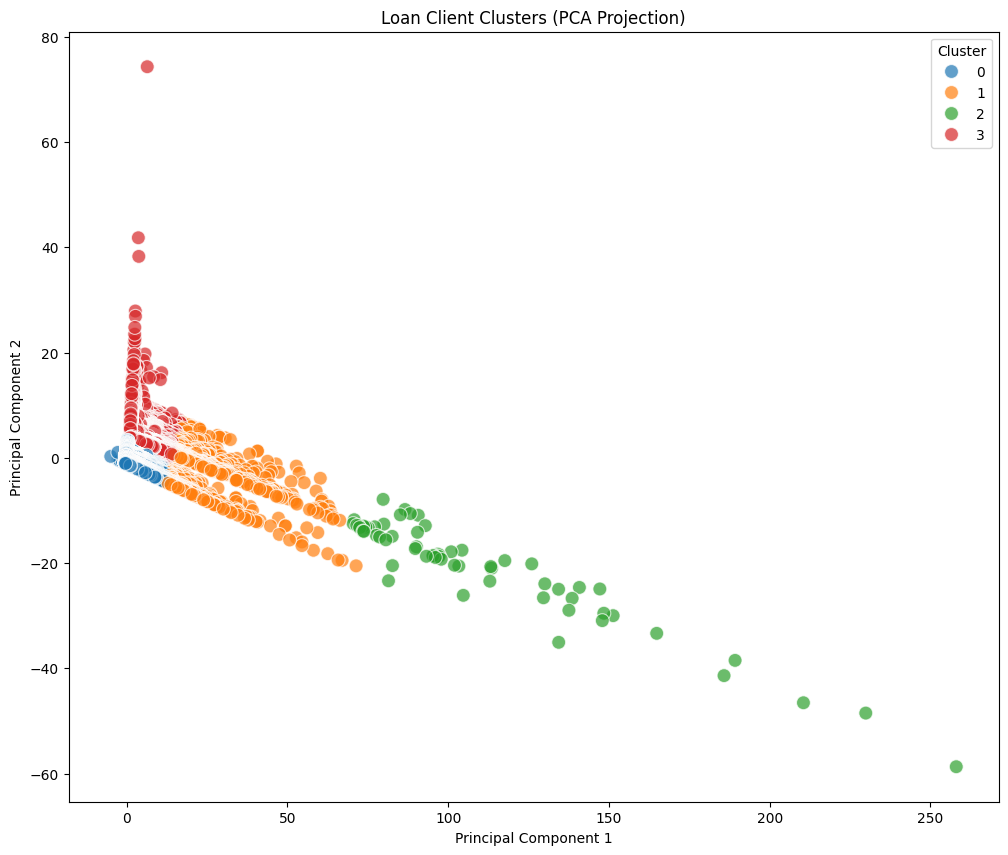

In [37]:
from sklearn.decomposition import PCA

# Add PCA for dimensionality reduction
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('pca', PCA(n_components=3))     # PCA for 2D visualization
])

# Transform the data to 2D
df_pca = pca_pipeline.fit_transform(df[cluster_features])

# Visualize the clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='tab10', s=100, alpha=0.7)
plt.title('Loan Client Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save plot as image for Powerpoint presentation
plt.savefig('clusters_pca_projection.png')

plt.show();


### **Cluster Summary (Numerical)**

In [38]:
# Summarize the average characteristics of each cluster and store it as a DataFrame
cluster_summary = df.groupby('Cluster')[cluster_features].mean().reset_index()

# Display the resulting DataFrame
cluster_summary_table = pd.DataFrame(data = cluster_summary)
cluster_summary_table

,Cluster,age,days_interest_calculated,revenue_per_loan,outstanding_penalty_fees,outstanding_daily_interest,penalty_fees_repayment,outstanding_revenue,loan_balance,outstanding_setup_fees,outstanding_principle,is_npl
0,0,5.768090,5.446174,0.101959,0.000000,74.654478,0.000000,8.836605e+02,8.853328e+02,20.677085,788.328933,0.000000
1,1,68.088685,22.646789,0.000150,15572.367752,49145.900428,0.000000,2.728224e+05,2.728223e+05,5144.893823,202959.222110,0.623853
2,2,123.112903,31.032258,0.000000,97444.726452,265616.540968,0.000000,1.139863e+06,1.139862e+06,17154.312097,759646.957097,0.935484
3,3,81.565099,31.185871,0.393191,1315.303483,3464.717259,841.312595,1.387675e+04,1.387661e+04,243.105480,8853.627161,0.997482


In [39]:
# Optionally, save to a CSV file if needed
#cluster_summary_table.to_csv("cluster_summary_table.csv", index=False)

## KEY INSIGHTS

### **Feature Importance**


The following features from the original dataset were found to have the greatest influence on a client's ability to fulfill their loan repayment obligations:
 - 'age'
 - 'days_interest_calculated'
 - 'revenue_per_loan'
 - 'outstanding_penalty_fees'
 - 'outstanding_daily_interest'
 - 'penalty_fees_repayment'
 - 'outstanding_revenue'
 - 'loan_balance'
 - 'outstanding_setup_fees'
 - 'outstanding_principle'
 - 'is_npl'

### **Explanation of Results of K_Means Clustering**


1.) **Cluster 0 (Low-Risk Borrowers)**  
   - Relatively low age indicating that borrowers tend to pay back loans within a short period.
   - Minimal outstanding penalty fees and daily interest indicating timely loan repayments.
   - High revenue per loan averaging approximately 10% for this group.
   - Low loan balance averaging less than 1000 units.
   - This suggests responsible borrowers who repay on time, generating steady income.

2.) **Cluster 1 (High-Risk Defaulters)**  
   - Relatively high age (averaging roughly 9 weeks) stipulating clients borrowing loans over longer periods of time.
   - High levels of outstanding fees including outstanding; setup fees, principle, revenue daily interest and penalty fees.
   - Tendency not to pay penalty fees indicates lack of commitment to loan repayment responsibilities.
   - Very low revenue per loan ratio, shows poor return on investment from this group of clients.  
   - Extremely high outstanding loan balances, suggesting prolonged non-repayment.  
   - This cluster represents long-term defaulters.

3.) **Cluster 2 (Moderate-Risk Borrowers with Partial Repayments)**  
   - High loan age (averaging roughly 10 weeks), even higher than that in Cluster 1.
   - Some penalty fees have been repaid, unlike Cluster 1, indicating a desire to pay back the money borrowed by the clients in this group. 
   - Reasonable outstanding loan balance; which averages at about 12,700 units as compared to cluster 1, whose outstanding loan balance averages out at abround 269,605 units. Despite having lower outstanding  loan balances, they still pose risk to the loanbook.  
   - This cluster consists of borrowers making partial repayments but struggling.

4.) **Cluster 3 (Extreme Defaulters with Large Loans)**  
   - Very high outstanding balances, setup fees, and penalties even when compared to cluster 1(High Risk Defaulters)  
   - Zero revenue per loan, indicating severe non-payment and no benefit ot the business from this group of clients.  
   - Highest outstanding principle, suggesting large loan sizes.  
   - This represents the riskiest segment, possibly requiring legal action or write-offs.


#### Inferences:

- Clusters 0 and 2 contain manageable borrowers, with Cluster 0 being the most profitable. Cluster 2 is categorized by clients who though risky, show initiative in fulfilling their loan obligations. Measures should be established to incentivize this group (cluster 2) to make more regular and timely payments.

- Clusters 1 and 3 pose high financial risk, with Cluster 3 being the most problematic. Loan agents should focus on mitigating risk in Clusters 1 and 3, possibly through stricter lending criteria or tailored repayment plans. 

## RECOMMENDATIONS

1. Generate stricter criteria for borrowing large sums of money over extended periods(as noted in clusters 1 & 3) as this has shown to be problematic once the recovery stage is reached. These common features amonst risky borrowers should be targeted and mitigated to prevent exposure of the business to averse risk.

2. Generate short as well as long term strategies to recover loan book portfolio at risk. Short term strategies can include establishing  incentives for early/ timely loan and fees repayments.

### NEXT STEP(S)

**Develop an early warning loan default detection machine-learning model**

- Using time-series as well as sequential modelling to create a system that is able to detect and flag loans likely to go into default in the near future.

## CONCLUSION

The clustering analysis successfully delineated four distinct borrower segments, each exhibiting unique repayment behaviors and risk profiles. Low-risk borrowers demonstrated prompt repayment and stable revenue contributions, while high-risk segments—particularly the extreme defaulters—were characterized by prolonged non-repayment and substantial outstanding balances. The feature importance analysis further highlighted critical predictors of credit risk, underscoring the significance of loan age, days interest calculated, and revenue per loan. These findings not only validate the effectiveness of unsupervised clustering in credit risk assessment but also lay the groundwork for advanced predictive modeling, such as early warning systems for loan defaults. Overall, the project provides actionable insights to optimize loan management practices and mitigate potential financial risks.

### **Author:**
- David Kirianja